In [4]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file


Saving video_tool_sequence_updated.csv to video_tool_sequence_updated.csv


In [5]:

import pandas as pd

file_name = "video_tool_sequence_updated.csv"  # Use the uploaded file's name
df = pd.read_csv(file_name)

# Check the first few rows
print(df.head())


                                          Video Name  \
0  10 Photoshop Features Every Graphic Designer S...   
1  3D Type stack ｜ Introduction to 3D in Adobe Ph...   
2  A Basic Introduction to Illustration in Photos...   
3  Adobe Dimension Tutorial ｜ 3D Mockups for Begi...   
4  Advanced 3D Typography Effects PART 1 Photosho...   

                                            Action_x     Video Category  \
0  Zoom -> Note -> Line -> Pen -> Line -> Crop ->...  Graphic Designing   
1  Line -> Pen -> Line -> Move -> Line -> Move ->...         3D Mockups   
2  Line -> Pen -> Eraser -> Hand -> Pen -> Brush ...   Digital Painting   
3  Gradient -> Move -> Hand -> Pen -> Hand -> Pen...         3D Mockups   
4  Pen -> Gradient -> Marquee -> Gradient -> Brus...  Graphic Designing   

  Experience Level     Age Group Video Upload Date Gender    Likes     Views  \
0     Intermediate         Young         27/1/2017   Male   8800.0  417405.0   
1         Beginner         Young               NaN  

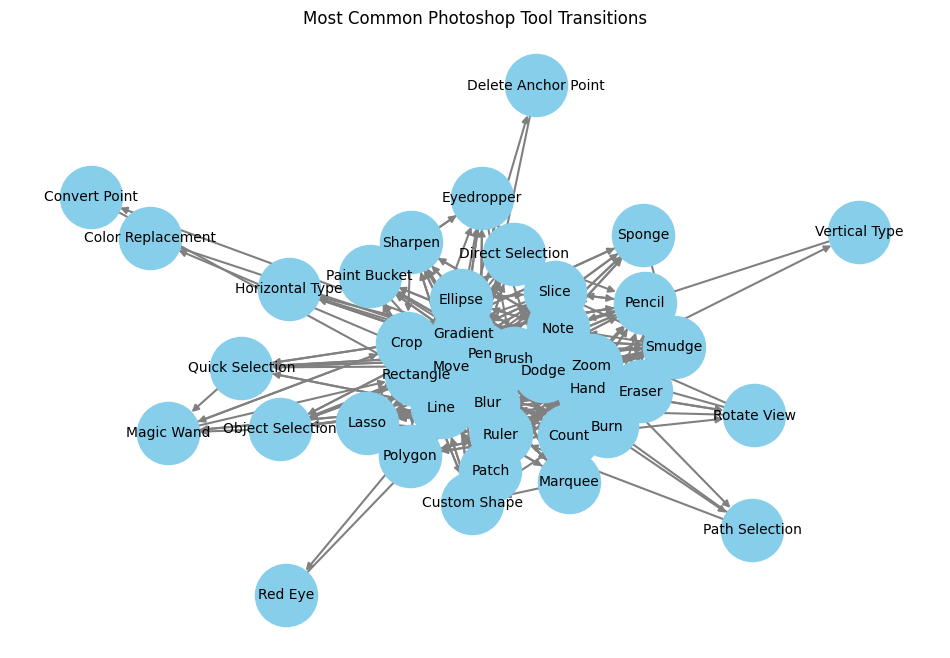

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/video_tool_sequence_updated.csv"  # Update if necessary
df = pd.read_csv(file_path)

# Extract relevant data
if 'Action_x' in df.columns and 'Video Category' in df.columns:
    plt.figure(figsize=(12, 8))

    G = nx.DiGraph()

    for _, row in df.iterrows():
        tools = str(row["Action_x"]).split(" -> ")
        for i in range(len(tools) - 1):
            G.add_edge(tools[i], tools[i + 1])

    # Draw network graph
    plt.title("Most Common Photoshop Tool Transitions")
    pos = nx.spring_layout(G, k=0.5)
    nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10, node_color="skyblue", edge_color="gray", width=1.5)
    plt.show()

else:
    print("Columns 'Action_x' and 'Video Category' not found in the dataset.")



In [15]:
import plotly.graph_objects as go

# Extract tool sequences
if 'Action_x' in df.columns and 'Video Category' in df.columns:
    tool_counts = df['Action_x'].value_counts().head(10)  # Top 10 sequences

    sources = []
    targets = []
    values = []

    for sequence, count in tool_counts.items():
        tools = sequence.split(" -> ")
        for i in range(len(tools) - 1):
            sources.append(tools[i])
            targets.append(tools[i + 1])
            values.append(count)

    unique_labels = list(set(sources + targets))
    label_map = {label: i for i, label in enumerate(unique_labels)}

    fig = go.Figure(go.Sankey(
        node=dict(label=unique_labels, pad=15, thickness=20, color="skyblue"),
        link=dict(
            source=[label_map[src] for src in sources],
            target=[label_map[tgt] for tgt in targets],
            value=values
        )
    ))

    fig.update_layout(title_text="Tool Usage Flow (Sankey Diagram)", font_size=12)
    fig.show()
else:
    print("Columns 'Action_x' and 'Video Category' not found in the dataset.")


<ipython-input-16-ba2efd0c3ae1>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




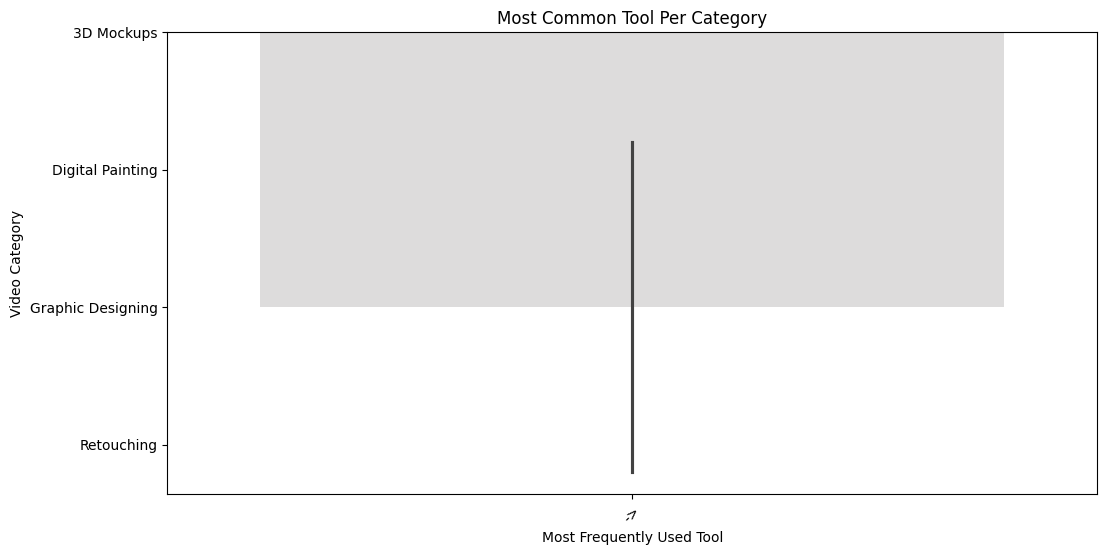

In [16]:
import seaborn as sns

if 'Video Category' in df.columns and 'Action_x' in df.columns:
    category_tools = df.groupby('Video Category')['Action_x'].apply(lambda x: ' '.join(x)).reset_index()
    category_tools['Most Used Tool'] = category_tools['Action_x'].apply(lambda x: pd.Series(x.split()).value_counts().idxmax())

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Most Used Tool', y='Video Category', data=category_tools, palette='coolwarm')
    plt.xlabel("Most Frequently Used Tool")
    plt.ylabel("Video Category")
    plt.title("Most Common Tool Per Category")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Columns 'Video Category' and 'Action_x' not found.")


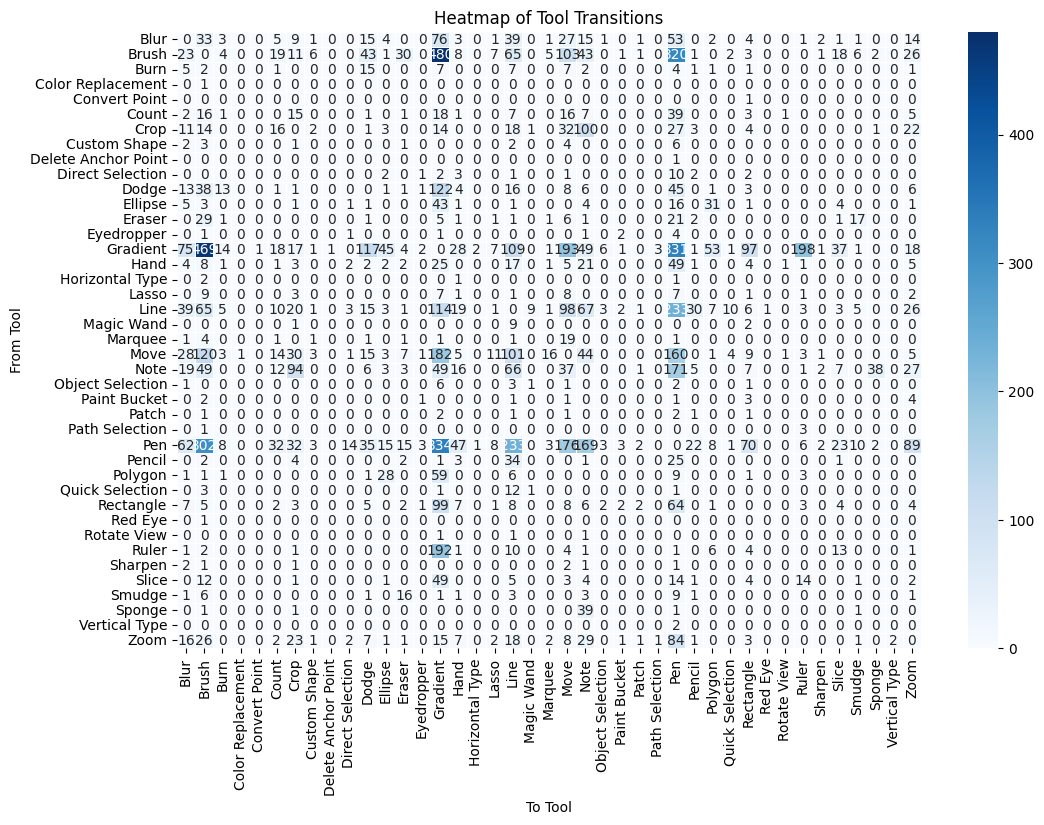

In [6]:
import numpy as np
import seaborn as sns

if 'Action_x' in df.columns:
    transition_matrix = {}

    for _, row in df.iterrows():
        tools = row["Action_x"].split(" -> ")
        for i in range(len(tools) - 1):
            if (tools[i], tools[i + 1]) in transition_matrix:
                transition_matrix[(tools[i], tools[i + 1])] += 1
            else:
                transition_matrix[(tools[i], tools[i + 1])] = 1

    matrix_df = pd.DataFrame(list(transition_matrix.items()), columns=["Tool Pair", "Count"])
    matrix_df[['From', 'To']] = pd.DataFrame(matrix_df["Tool Pair"].tolist(), index=matrix_df.index)

    pivot_table = matrix_df.pivot(index="From", columns="To", values="Count").fillna(0)

    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
    plt.title("Heatmap of Tool Transitions")
    plt.xlabel("To Tool")
    plt.ylabel("From Tool")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
else:
    print("Column 'Action_x' not found.")


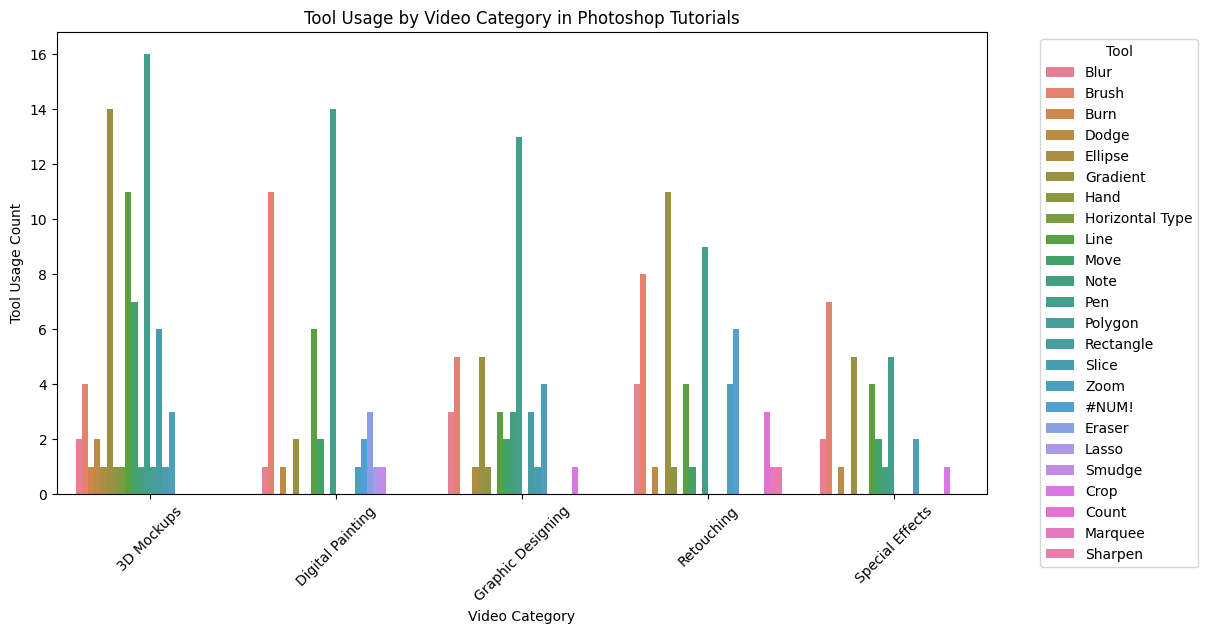

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_file.csv' with the actual file path)
#file_path = "your_file.csv"
#df = pd.read_csv(file_path)

# Melt the dataset to have a single column for tools
tool_columns = ["#1 tool", "#2 tool", "#3 tool"]
df_melted = df.melt(id_vars=["Video Category"], value_vars=tool_columns, var_name="Tool Rank", value_name="Tool")

# Count tool usage per category
tool_usage = df_melted.groupby(["Video Category", "Tool"]).size().reset_index(name="Count")

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=tool_usage, x="Video Category", y="Count", hue="Tool", dodge=True)
plt.xticks(rotation=45)
plt.xlabel("Video Category")
plt.ylabel("Tool Usage Count")
plt.title("Tool Usage by Video Category in Photoshop Tutorials")
plt.legend(title="Tool", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


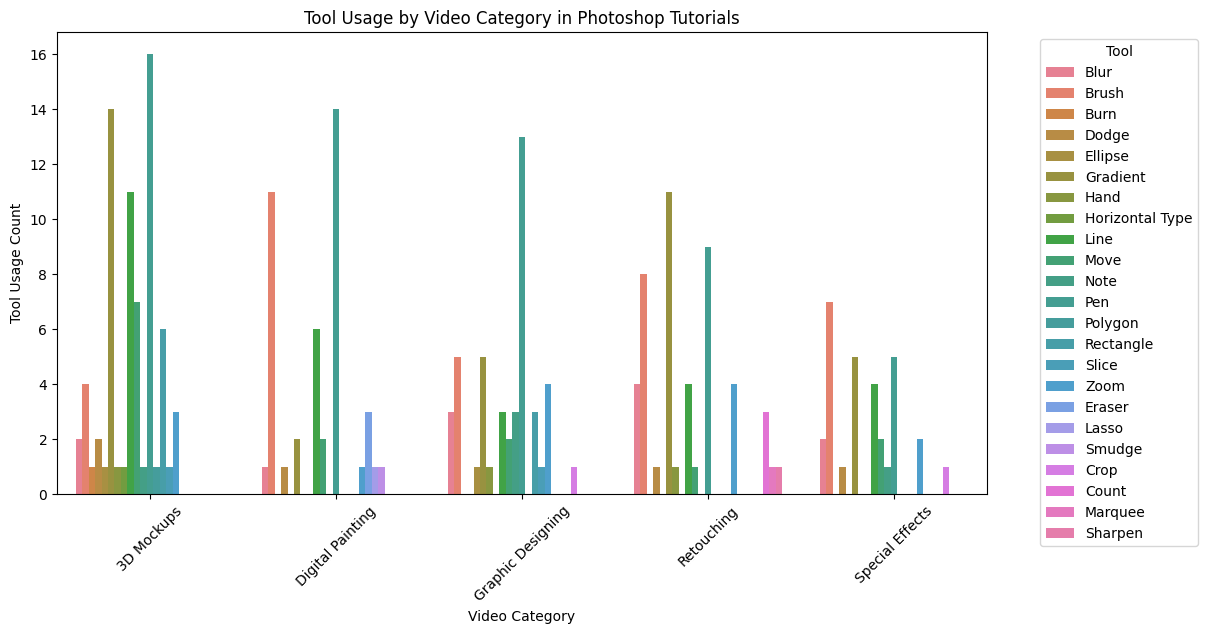

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the dataset to have a single column for tools
tool_columns = ["#1 tool", "#2 tool", "#3 tool"]
df_melted = df.melt(id_vars=["Video Category"], value_vars=tool_columns, var_name="Tool Rank", value_name="Tool")

# ✅ Remove NaN values and "#NUM!" entries
df_melted = df_melted.dropna(subset=["Tool"])  # Remove NaN values
df_melted = df_melted[df_melted["Tool"] != "#NUM!"]  # Remove "#NUM!" values

# Count tool usage per category
tool_usage = df_melted.groupby(["Video Category", "Tool"]).size().reset_index(name="Count")

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=tool_usage, x="Video Category", y="Count", hue="Tool", dodge=True)
plt.xticks(rotation=45)
plt.xlabel("Video Category")
plt.ylabel("Tool Usage Count")
plt.title("Tool Usage by Video Category in Photoshop Tutorials")
plt.legend(title="Tool", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


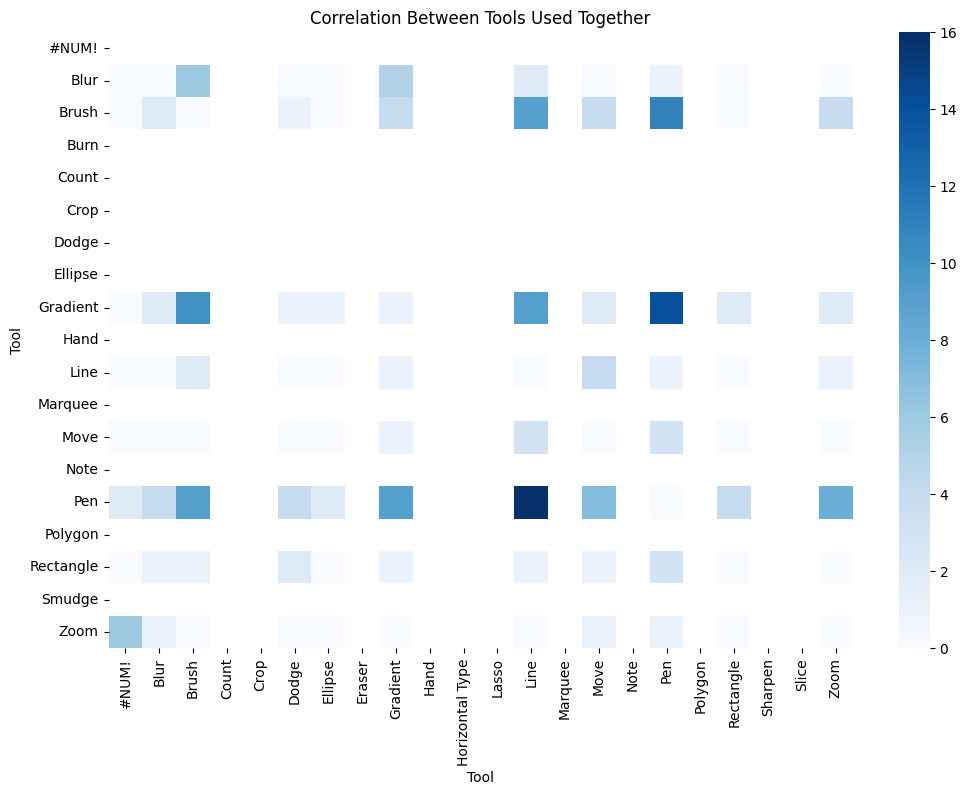

In [8]:
# 3. Heatmap: Correlation between different tools used together
tool_usage_matrix = pd.crosstab(df["#1 tool"], df["#2 tool"]) + pd.crosstab(df["#1 tool"], df["#3 tool"]) + pd.crosstab(df["#2 tool"], df["#3 tool"])

plt.figure(figsize=(12, 8))
sns.heatmap(tool_usage_matrix, cmap="Blues", annot=False)
plt.title("Correlation Between Tools Used Together")
plt.xlabel("Tool")
plt.ylabel("Tool")
plt.show()


<ipython-input-9-01f7fdb2dd48>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tools.index, y=top_tools.values,palette="viridis")


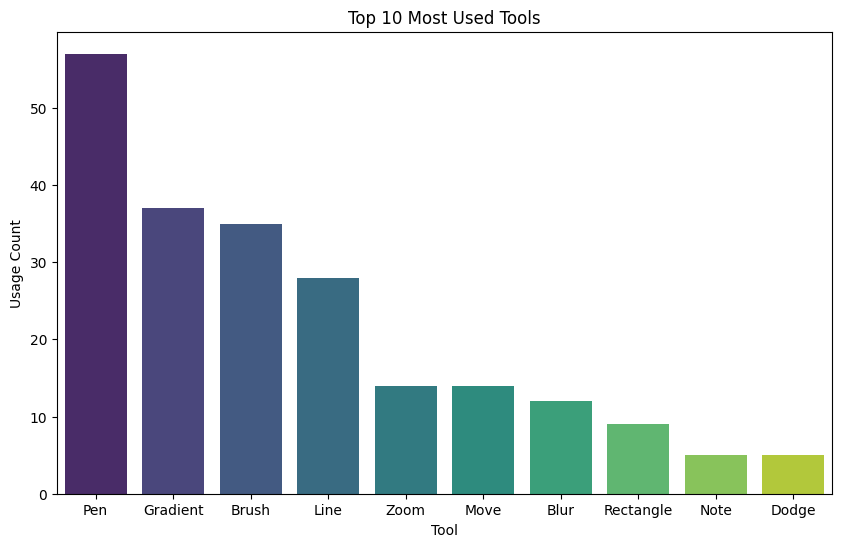

In [9]:
 #1. Bar Chart: Top 10 most used tools
tool_columns = ["#1 tool", "#2 tool", "#3 tool"]
tools = df[tool_columns].melt(value_name="Tool")["Tool"]
tools = tools[tools.notna()]  # Remove NaN values
tools = tools[tools.str.strip() != ""]  # Remove empty strings
tools = tools[tools != "#NUM!"]  # Remove "#NUM!"

top_tools = tools.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_tools.index, y=top_tools.values,palette="viridis")
plt.xlabel("Tool")
plt.ylabel("Usage Count")
plt.title("Top 10 Most Used Tools")
plt.show()

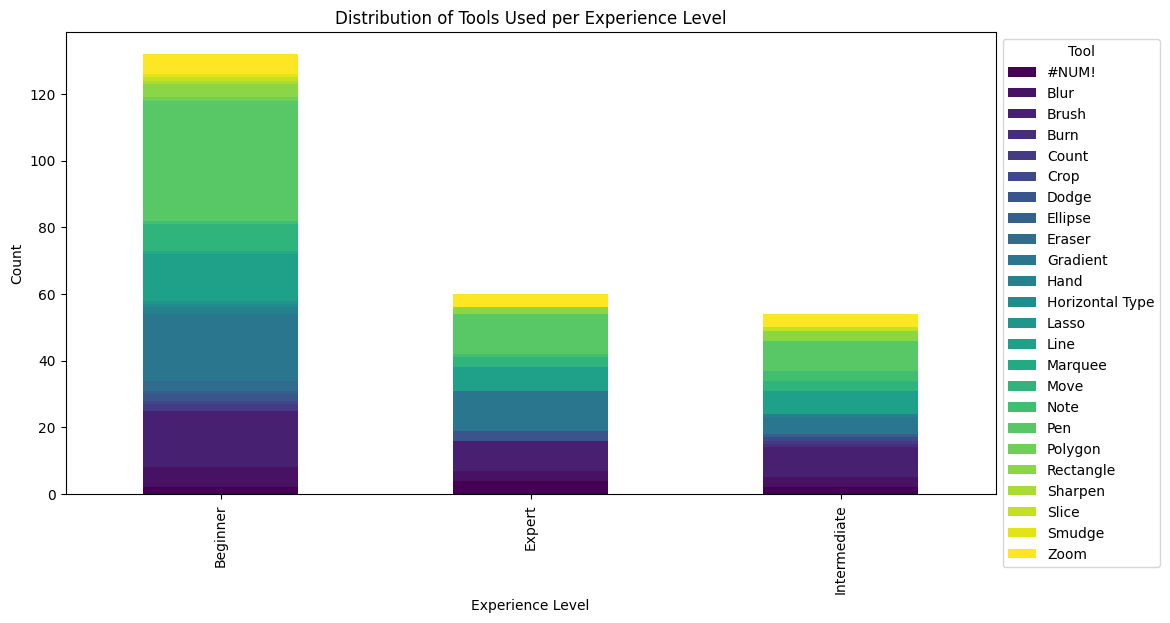

In [19]:
# 2. Stacked Bar Chart: Tool usage per experience level
experience_tool_df = df.melt(id_vars=["Experience Level"], value_vars=tool_columns, var_name="Tool Rank", value_name="Tool")
experience_tool_count = experience_tool_df.groupby(["Experience Level", "Tool"]).size().unstack().fillna(0)

experience_tool_count.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.ylabel("Count")
plt.title("Distribution of Tools Used per Experience Level")
plt.legend(title="Tool", bbox_to_anchor=(1, 1))
plt.show()

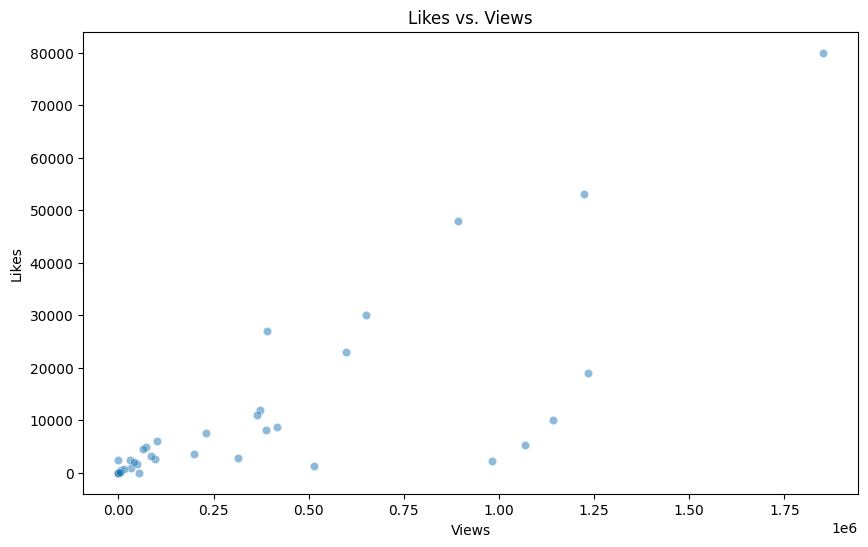

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Views"], y=df["Likes"], alpha=0.5)
plt.xlabel("Views")
plt.ylabel("Likes")
plt.title("Likes vs. Views")
plt.show()

<ipython-input-20-1fdba5694af5>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




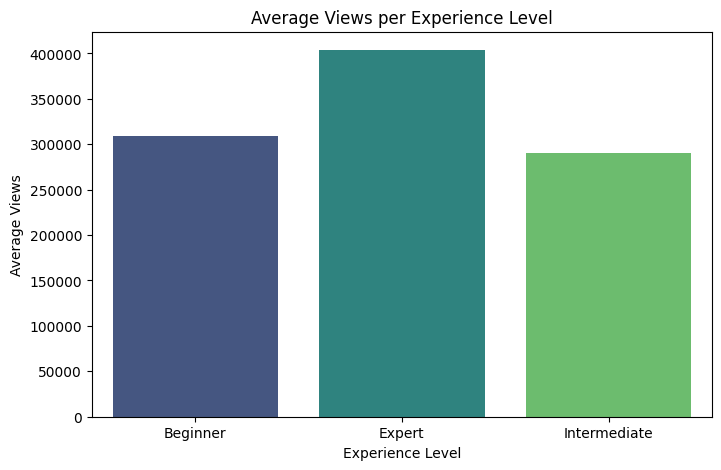

In [20]:

# 5. Bar Chart: Average views per experience level
avg_views = df.groupby("Experience Level")["Views"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_views.index, y=avg_views.values, palette="viridis")
plt.xlabel("Experience Level")
plt.ylabel("Average Views")
plt.title("Average Views per Experience Level")
plt.show()

<ipython-input-29-70a4e84c0a3f>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




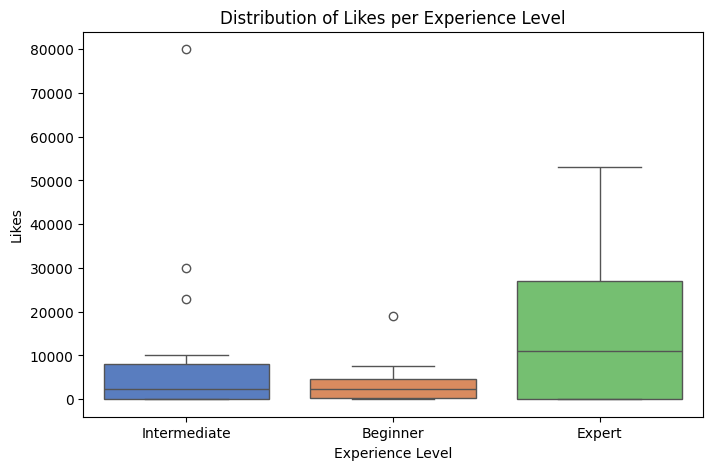

In [ ]:
# 6. Box Plot: Distribution of likes per experience level
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Experience Level"], y=df["Likes"], palette="muted")
plt.xlabel("Experience Level")
plt.ylabel("Likes")
plt.title("Distribution of Likes per Experience Level")
plt.show()

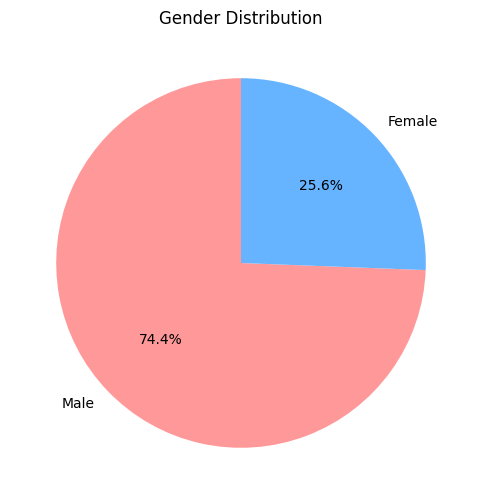

In [ ]:
# 7. Pie Chart: Gender distribution
plt.figure(figsize=(6, 6))
df["Gender"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#ff9999", "#66b3ff"], startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

<ipython-input-31-744eae8112a5>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




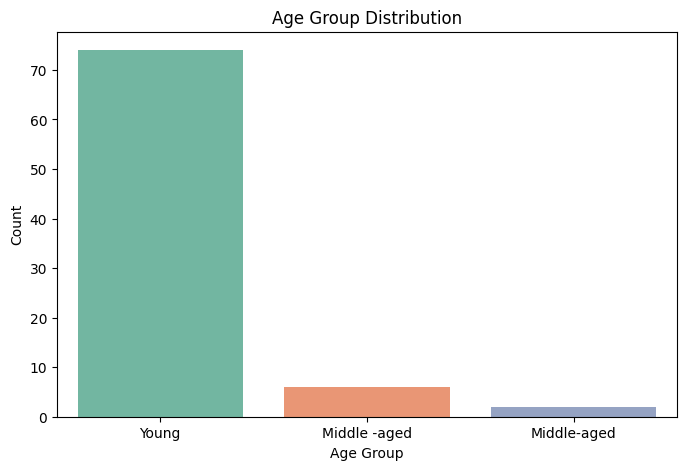

In [ ]:
# 8. Bar Chart: Age group distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Age Group"], palette="Set2")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Age Group Distribution")
plt.show()

<ipython-input-32-1dacbe57ecb0>:3: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



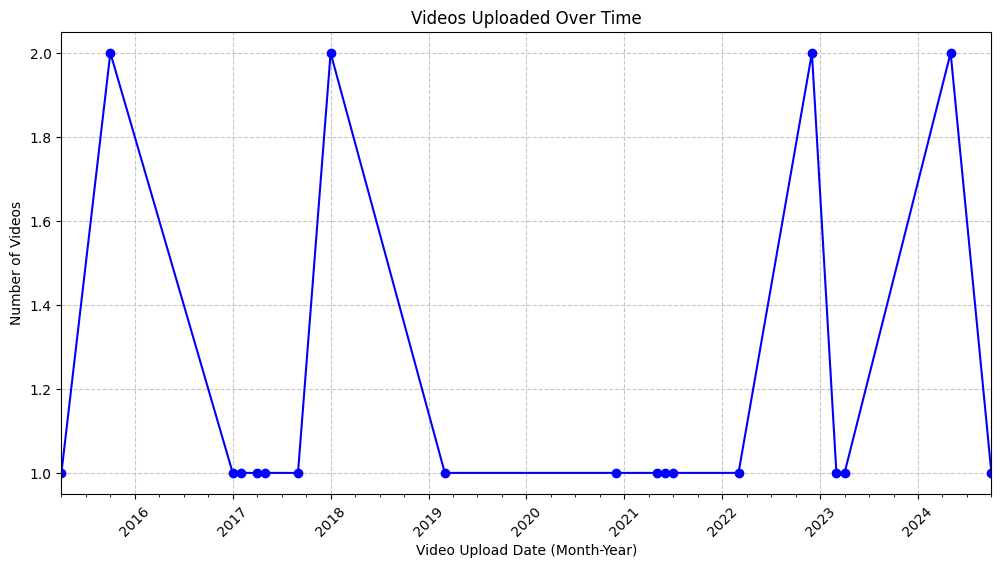

In [ ]:
if "Video Upload Date" in df.columns:
    # Convert to datetime format
    df["Video Upload Date"] = pd.to_datetime(df["Video Upload Date"], errors='coerce')

    # Remove invalid dates
    df = df.dropna(subset=["Video Upload Date"])

    # Group by month and count number of videos
    video_trend = df.groupby(df["Video Upload Date"].dt.to_period("M")).size()

    # Plot
    plt.figure(figsize=(12, 6))
    video_trend.plot(marker="o", linestyle="-", color="b")

    plt.xlabel("Video Upload Date (Month-Year)")
    plt.ylabel("Number of Videos")
    plt.title("Videos Uploaded Over Time")
    plt.grid(True, linestyle="--", alpha=0.7)  # Add grid for better readability
    plt.xticks(rotation=45)

    plt.show()
else:
    print("Column 'Video Upload Date' not found in the dataset.")

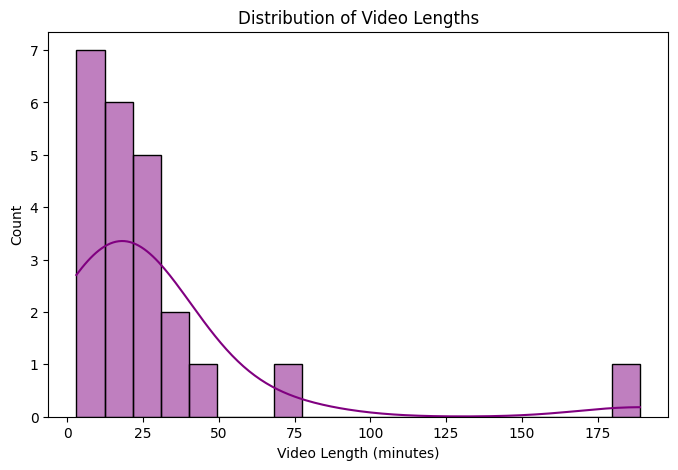

In [ ]:
#Histogram: Distribution of video lengths
if "Video Length" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df["Video Length"], bins=20, kde=True, color="purple")
    plt.xlabel("Video Length (minutes)")
    plt.ylabel("Count")
    plt.title("Distribution of Video Lengths")
    plt.show()
else:
    print("Column 'Video Length' not found in the dataset.")


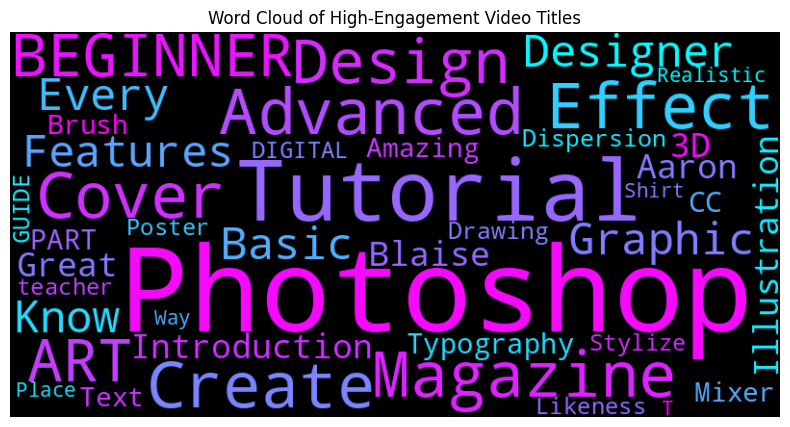

In [ ]:
from wordcloud import WordCloud

high_engagement_titles = df[df["Views"] > df["Views"].median()]["Video Name"].dropna()
text = " ".join(high_engagement_titles)

wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="cool").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of High-Engagement Video Titles")
plt.show()

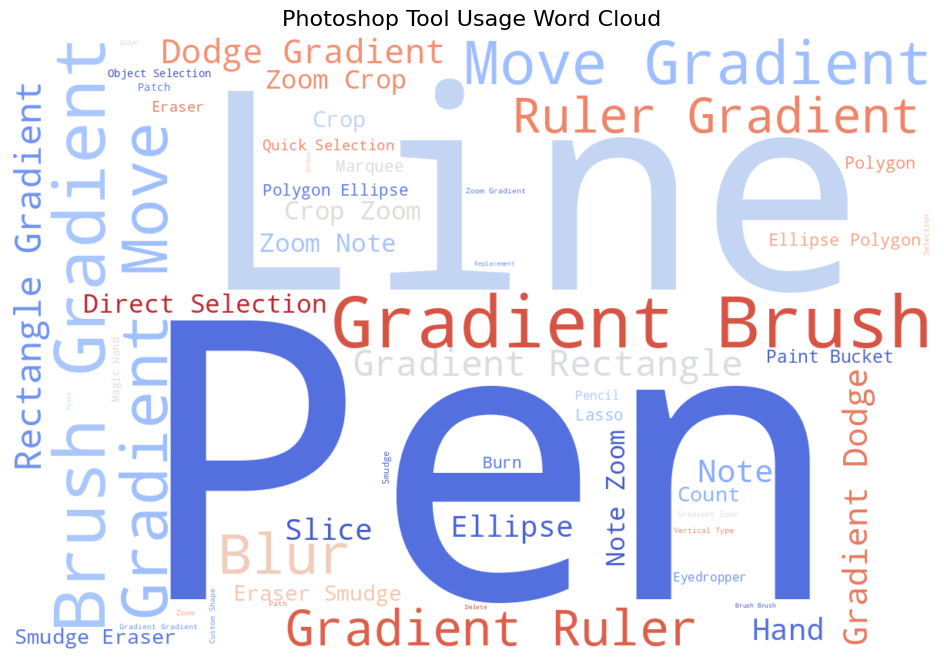

In [ ]:
tool_text = " ".join(df["Action_x"].dropna())

# Generate WordCloud
wordcloud = WordCloud(width=1200, height=800, background_color="white", colormap="coolwarm").generate(tool_text)

# Plot the WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Photoshop Tool Usage Word Cloud", fontsize=16)
plt.show()

In [10]:

import pandas as pd
import plotly.graph_objects as go

# Check required columns
if 'Video Category' in df.columns and 'Action_x' in df.columns:
    sankey_data = []

    for category in df['Video Category'].unique():
        category_data = df[df['Video Category'] == category]
        tool_transitions = {}

        # Process each tool sequence
        for sequence in category_data['Action_x'].dropna():
            tools = sequence.split(" -> ")
            for i in range(len(tools) - 1):
                key = (tools[i], tools[i+1])
                tool_transitions[key] = tool_transitions.get(key, 0) + 1

        # Extract data for Sankey
        sources, targets, values = [], [], []
        for (src, tgt), count in tool_transitions.items():
            sources.append(src)
            targets.append(tgt)
            values.append(count)

        # Create Sankey diagram
        fig = go.Figure(go.Sankey(
            node=dict(
                pad=15, thickness=20,
                label=list(set(sources + targets))  # Unique tools as nodes
            ),
            link=dict(
                source=[list(set(sources + targets)).index(src) for src in sources],
                target=[list(set(sources + targets)).index(tgt) for tgt in targets],
                value=values
            )
        ))

        fig.update_layout(title_text=f"Tool Usage Flow: {category}", font_size=12)
        fig.show()
else:
    print("Columns 'Video Category' and 'Action_x' not found.")

In [3]:
!pip install dash pandas plotly jupyter-dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.6 MB/s eta 0:00:00


In [2]:
!pip install pyngrok


In [11]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from flask import Flask
from threading import Thread
from pyngrok import ngrok
import numpy as np


# Load dataset
#file_path = "/content/video_tool_sequence_updated.csv"  # Update this path
#df = pd.read_csv(file_path)

# Convert necessary columns to numeric where needed
df["Views"] = pd.to_numeric(df["Views"], errors='coerce')
df["Likes"] = pd.to_numeric(df["Likes"], errors='coerce')
df["Video Length"] = pd.to_numeric(df["Video Length"], errors='coerce')

# Initialize Flask server for Dash
server = Flask(__name__)
app = dash.Dash(__name__, server=server)

# Define layout
app.layout = html.Div([
    html.H1("Interactive Photoshop Workflow Dashboard", style={'textAlign': 'center'}),

    # Dropdown for selecting the metric
    html.Label("Select a Feature:"),
    dcc.Dropdown(
        id="feature_dropdown",
        options=[
            {"label": "Views", "value": "Views"},
            {"label": "Likes", "value": "Likes"},
            {"label": "Video Length", "value": "Video Length"},
            {"label": "Gender", "value": "Gender"},
            {"label": "Region", "value": "Region"},
        ],
        value="Views",
        clearable=False,
        style={'width': '50%'}
    ),

    # Bar chart output
    dcc.Graph(id="bar_chart"),

    # Add slider for filtering views/likes range
    html.Label("Filter by Views:"),
    dcc.Slider(
        id='view_slider',
        min=df["Views"].min(),
        max=df["Views"].max(),
        value=df["Views"].max(),
        marks={int(val): str(int(val)) for val in df["Views"].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()},
        step=1000
    ),
])

# Callback function to update the chart
@app.callback(
    Output("bar_chart", "figure"),
    [Input("feature_dropdown", "value"), Input("view_slider", "value")]
)
def update_chart(selected_feature, max_views):
    filtered_df = df[df["Views"] <= max_views]

    if selected_feature in ["Views", "Likes", "Video Length"]:
        fig = px.bar(filtered_df, x="Video Category", y=selected_feature, color="Video Category",
                     title=f"{selected_feature} by Video Category", barmode="group")
    else:
        fig = px.histogram(filtered_df, x=selected_feature, color="Video Category",
                           title=f"Distribution of {selected_feature}", barmode="group")

    fig.write_html("interactive_plot.html")

    return fig

    df["Views"] = df["Views"].clip(lower=1)

# Apply log transformation for better scaling
df["Log_Views"] = np.log10(df["Views"])

# Update slider range based on log scale
html.Label("Filter by Views (Log Scale):"),
dcc.Slider(
    id='view_slider',
    min=df["Log_Views"].min(),
    max=df["Log_Views"].max(),
    value=df["Log_Views"].max(),
    marks={int(val): f"{int(10**val)}" for val in np.linspace(df["Log_Views"].min(), df["Log_Views"].max(), num=5)},
    step=0.1
)
df["Views"] = df["Views"].clip(lower=1)

# Apply log transformation for better scaling
df["Log_Views"] = np.log10(df["Views"])

# Update slider range based on log scale
html.Label("Filter by Views (Log Scale):"),
dcc.Slider(
    id='view_slider',
    min=df["Log_Views"].min(),
    max=df["Log_Views"].max(),
    value=df["Log_Views"].max(),
    marks={int(val): f"{int(10**val)}" for val in np.linspace(df["Log_Views"].min(), df["Log_Views"].max(), num=5)},
    step=0.1
)

html_bytes = buffer.getvalue().encode()
encoded = b64encode(html_bytes).decode()

html.A(
        html.Button("Download as HTML"),
        id="download",
        href="data:text/html;base64," + encoded,
        download="plotly_graph.html"
    )

app.run_server(mode="inline")




NameError: name 'buffer' is not defined

In [12]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash

# Load dataset
#ile_path = "/content/video_tool_sequence_updated.csv"  # Update with the correct path
#df = pd.read_csv(file_path)

# Convert necessary columns to numeric where needed
df["Views"] = pd.to_numeric(df["Views"], errors='coerce')
df["Likes"] = pd.to_numeric(df["Likes"], errors='coerce')
df["Video Length"] = pd.to_numeric(df["Video Length"], errors='coerce')

# Initialize Dash app
app = JupyterDash(__name__)

# Define layout
app.layout = html.Div([
    html.H1("Interactive Photoshop Workflow Dashboard", style={'textAlign': 'center'}),

    # Dropdown for selecting the metric
    html.Label("Select a Feature:"),
    dcc.Dropdown(
        id="feature_dropdown",
        options=[
            {"label": "Views", "value": "Views"},
            {"label": "Likes", "value": "Likes"},
            {"label": "Video Length", "value": "Video Length"},
            {"label": "Gender", "value": "Gender"},
            {"label": "Region", "value": "Region"},
        ],
        value="Views",
        clearable=False,
        style={'width': '50%'}
    ),

    # Bar chart output
    dcc.Graph(id="bar_chart"),

    # Add slider for filtering views/likes range
    html.Label("Filter by Views:"),
    dcc.Slider(
        id='view_slider',
        min=df["Views"].min(),
        max=df["Views"].max(),
        value=df["Views"].max(),
        marks={int(val): str(int(val)) for val in df["Views"].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()},
        step=1000
    ),
])

# Callback function to update the chart
@app.callback(
    Output("bar_chart", "figure"),
    [Input("feature_dropdown", "value"), Input("view_slider", "value")]
)
def update_chart(selected_feature, max_views):
    filtered_df = df[df["Views"] <= max_views]

    if selected_feature in ["Views", "Likes", "Video Length"]:
        fig = px.bar(filtered_df, x="Video Category", y=selected_feature, color="Video Category",
                     title=f"{selected_feature} by Video Category", barmode="group")
    else:
        fig = px.histogram(filtered_df, x=selected_feature, color="Video Category",
                           title=f"Distribution of {selected_feature}", barmode="group")

    return fig

# Run app
app.run_server(mode="inline")


/usr/local/lib/python3.11/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>